Import the necessary libraries for data analysis, visualization, and text processing. Also create directories (data and figures) to organize datasets and visualizations.

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os


os.makedirs('data', exist_ok=True)
os.makedirs('figures', exist_ok=True)

Load the watch history dataset from a CSV file into a pandas DataFrame. Convert the datetime column to a proper datetime format and provide an overview of the data by:

In [199]:
df = pd.read_csv('data/watch-history.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

Define the TemporalAnalyzer class, which is designed to analyze temporal patterns in the dataset.This class prepares the dataset for advanced temporal analysis and session-based insights.


1. Initialization (__init__)
Accept a DataFrame as input.
Preprocess the DataFrame using the _preprocess_data method.

2. Data Preprocessing (_preprocess_data)
Filter the data to include only rows with timestamps on or after January 1, 2024.

Add the following temporal features:
date: Extracted date from the datetime column.
month: Month as a number.
month_name: Full name of the month.
year: Year of the entry.
hour: Hour of the day.
day_of_week: Day name of the week.

Calculate time differences between consecutive rows (time_diff and minutes_diff).
Identify new sessions if the time gap exceeds 30 minutes (new_session).
Assign session IDs to group entries into distinct sessions using a cumulative sum (session_id).

In [200]:
class TemporalAnalyzer:

    def __init__(self, df):

        self.df = self._preprocess_data(df)
        plt.style.use('default')
        plt.rcParams.update({
            'figure.figsize': (12, 6),
            'font.size': 10
        })

    def _preprocess_data(self, df):
        
        df = df.copy()

        start_date = pd.Timestamp('2024-01-01')
        df = df[df['datetime'] >= start_date]
        
        df['date'] = df['datetime'].dt.date
        df['month'] = df['datetime'].dt.month
        df['month_name'] = df['datetime'].dt.month_name()
        df['year'] = df['datetime'].dt.year
        df['hour'] = df['datetime'].dt.hour
        df['day_of_week'] = df['datetime'].dt.day_name()
        
        # Calculate time differences for session analysis
        df = df.sort_values('datetime')
        df['time_diff'] = df['datetime'].diff()
        df['minutes_diff'] = df['time_diff'].dt.total_seconds() / 60
        # Define new session if gap is > 30 minutes
        df['new_session'] = df['minutes_diff'] > 30
        df['session_id'] = df['new_session'].cumsum()
        
        return df
    

In [201]:
analyzer = TemporalAnalyzer(df)

Generate a bar chart showing the average number of videos watched at different hours of the day.

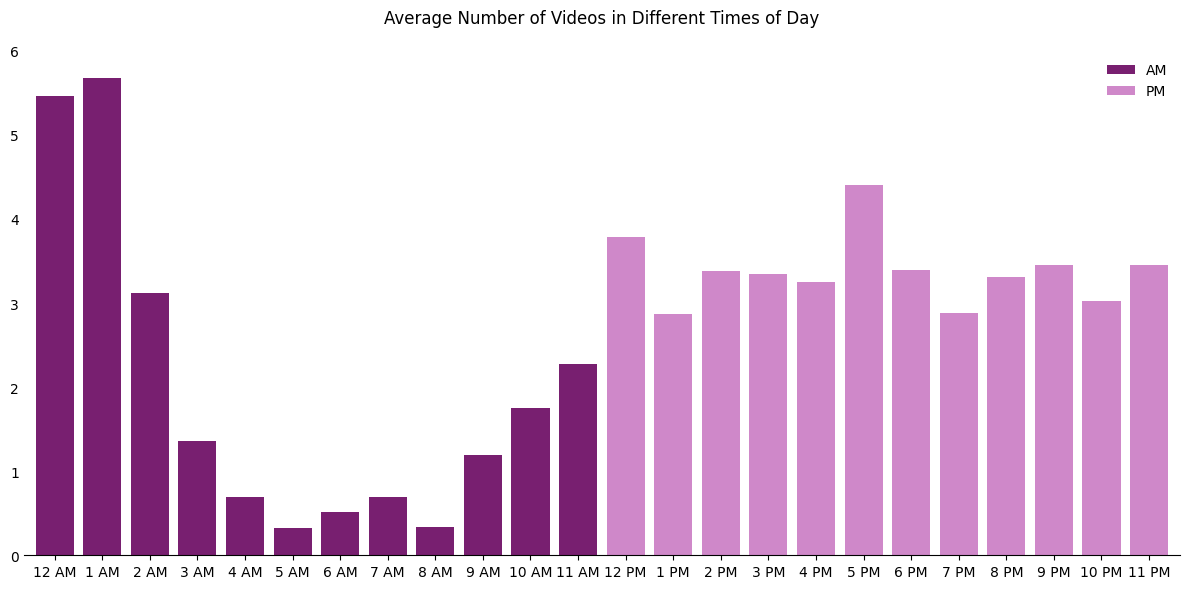

In [202]:
def analyze_hourly_patterns(self, output_dir='figures'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    hourly_counts = self.df.groupby('hour').size()
    hourly_avg = hourly_counts / self.df['date'].nunique()
    
    # Create hour labels
    hour_labels = {0: '12 AM', 1: '1 AM', 2: '2 AM', 3: '3 AM', 4: '4 AM', 5: '5 AM',
                   6: '6 AM', 7: '7 AM', 8: '8 AM', 9: '9 AM', 10: '10 AM', 11: '11 AM',
                   12: '12 PM', 13: '1 PM', 14: '2 PM', 15: '3 PM', 16: '4 PM', 17: '5 PM',
                   18: '6 PM', 19: '7 PM', 20: '8 PM', 21: '9 PM', 22: '10 PM', 23: '11 PM'}
    
    hourly_avg = hourly_avg.sort_index()
    hourly_avg.index = hourly_avg.index.map(hour_labels)
    

    colors = ['#781f70' if ('AM' in label) else '#cf88c9' for label in hourly_avg.index]
    
    plt.figure(figsize=(12, 6))
    ax = hourly_avg.plot(kind='bar', color=colors, width=0.8)
    
    ax.set_yticks(range(0, int(hourly_avg.max()) + 2, 1))
    ax.yaxis.set_tick_params(length=0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.title('Average Number of Videos in Different Times of Day', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=0, ha='center')
    
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#781f70', label='AM'),
        Patch(facecolor='#cf88c9', label='PM')
    ]
    
    ax.legend(handles=legend_elements, 
              loc='upper right',
              frameon=False,
              bbox_to_anchor=(1.0, 1.0))
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/hourly_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    result = {'hourly_averages': hourly_avg}

TemporalAnalyzer.analyze_hourly_patterns = analyze_hourly_patterns

analyzer.analyze_hourly_patterns()


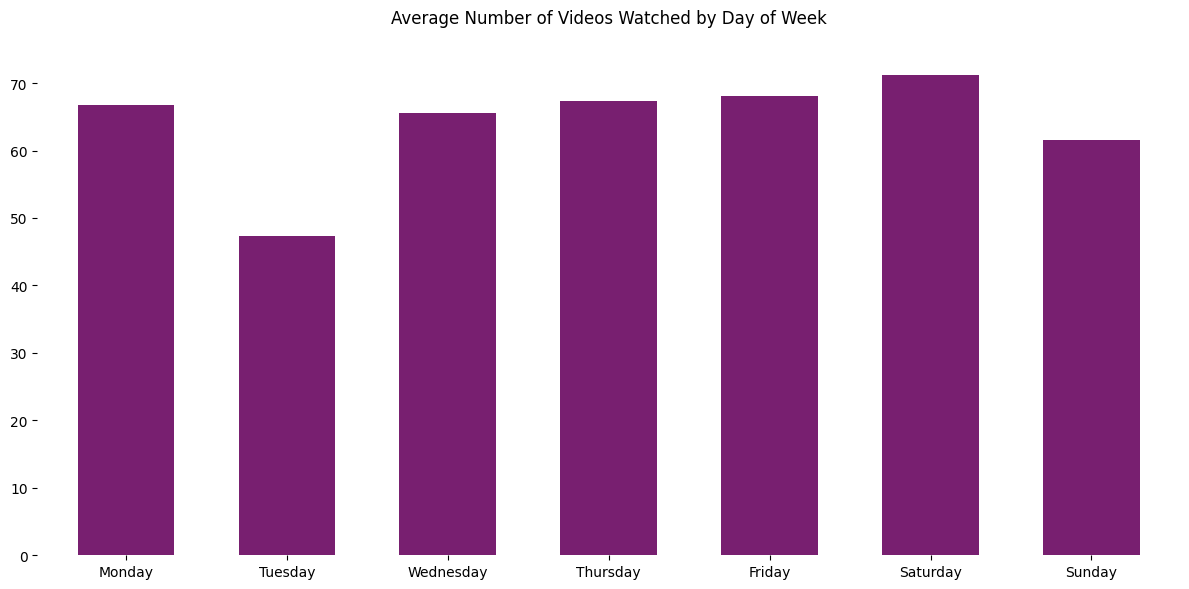

In [203]:
def analyze_daily_patterns(self, output_dir='figures'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_counts = self.df.groupby('day_of_week').size()
    daily_avg = (daily_counts / self.df['date'].nunique() * 7).reindex(day_order)
    
    plt.figure(figsize=(12, 6))
    ax = daily_avg.plot(kind='bar', color='#781f70', width=0.6)
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.title('Average Number of Videos Watched by Day of Week', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/daily_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    result = {'daily_averages': daily_avg}

TemporalAnalyzer.analyze_daily_patterns = analyze_daily_patterns

analyzer.analyze_daily_patterns()

Generate a line plot showing trends in the number of videos watched over months, grouped by year.

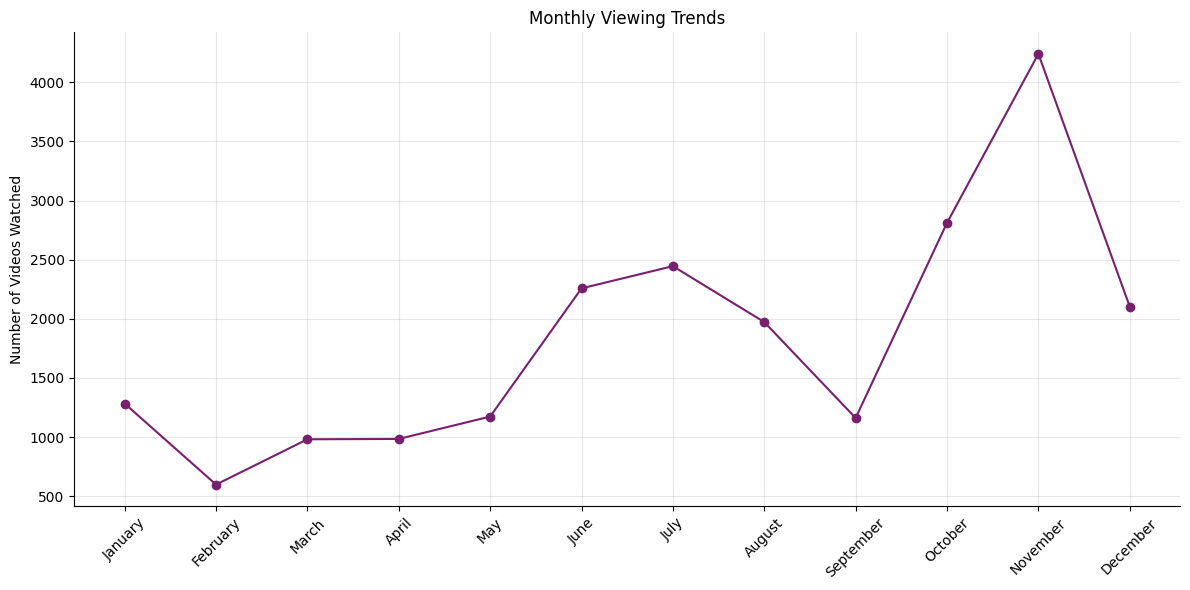

In [204]:
def analyze_monthly_trends(self, output_dir='figures'):
    
    os.makedirs(output_dir, exist_ok=True)
    
    monthly_counts = self.df.groupby(['year', 'month_name']).size().reset_index()
    monthly_counts.columns = ['year', 'month', 'count']
    
    monthly_counts['month'] = pd.Categorical(monthly_counts['month'], 
                                             categories=calendar.month_name[1:], 
                                             ordered=True)
    monthly_counts.sort_values(['year', 'month'], inplace=True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_counts['month'], monthly_counts['count'], marker='o', color='#781f70')
    plt.title('Monthly Viewing Trends')
    plt.ylabel('Number of Videos Watched')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/monthly_trends.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    result = {'monthly_counts': monthly_counts}

TemporalAnalyzer.analyze_monthly_trends = analyze_monthly_trends

analyzer.analyze_monthly_trends()


Identify binge-watching patterns based on session data and visualizes the percentage of binge sessions across different hours of the day.

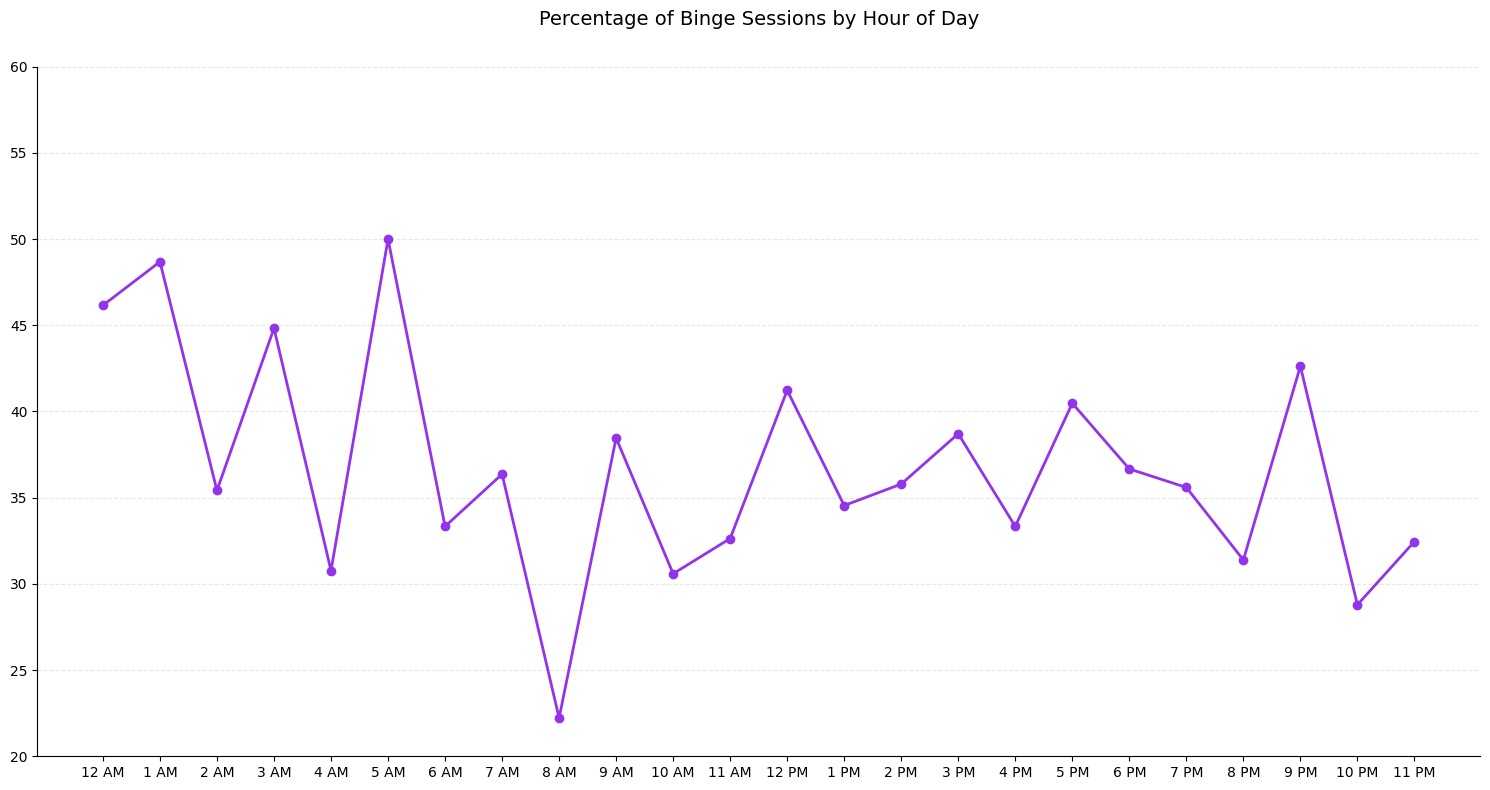

In [205]:
def analyze_binge_patterns(self, output_dir='figures'):
    
    session_stats = self.df.groupby('session_id').agg({
        'datetime': ['count', 'min', 'max'],
        'hour': 'first'  
    })
    
    session_stats.columns = ['videos_count', 'start_time', 'end_time', 'start_hour']
    session_stats['is_binge'] = session_stats['videos_count'] > 5
    
    hourly_stats = []
    for hour in range(24):
        hour_sessions = session_stats[session_stats['start_hour'] == hour]
        if len(hour_sessions) > 0:
            binge_pct = (sum(hour_sessions['is_binge']) / len(hour_sessions) * 100)
        else:
            binge_pct = 0
        hourly_stats.append({
            'hour': hour,
            'binge_percentage': binge_pct
        })
    
    hourly_df = pd.DataFrame(hourly_stats)
    
    hour_labels = {
        0: '12 AM', 1: '1 AM', 2: '2 AM', 3: '3 AM', 4: '4 AM', 5: '5 AM',
        6: '6 AM', 7: '7 AM', 8: '8 AM', 9: '9 AM', 10: '10 AM', 11: '11 AM',
        12: '12 PM', 13: '1 PM', 14: '2 PM', 15: '3 PM', 16: '4 PM', 17: '5 PM',
        18: '6 PM', 19: '7 PM', 20: '8 PM', 21: '9 PM', 22: '10 PM', 23: '11 PM'
    }
    hourly_df['hour_label'] = hourly_df['hour'].map(hour_labels)
    
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    
    plt.plot(hourly_df['hour_label'], hourly_df['binge_percentage'], 
             marker='o', color='#9333ea', linewidth=2, markersize=6)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title('Percentage of Binge Sessions by Hour of Day', pad=30, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(rotation=0, ha='center')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.ylim(20, 60)
    plt.tight_layout()
    
    plt.savefig(f'{output_dir}/binge_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    result = {
        'hourly_stats': hourly_df[['hour_label', 'binge_percentage']],
        'overall_metrics': {
            'overall_binge_percentage': (sum(session_stats['is_binge']) / len(session_stats)) * 100
        }
    }

TemporalAnalyzer.analyze_binge_patterns = analyze_binge_patterns

analyzer.analyze_binge_patterns()